In [3]:
from radiomics import featureextractor
import os
from pathlib import Path
import pandas as pd
import logging


In [8]:

class TexturesError(Exception):
    """Base error related to Texture analysis method"""

def params_file_path(modality):
    main_path = Path('params_files')

    if modality == 'CT':
        params_path = main_path / 'params_CT.yaml'
    elif modality == 'MR':
        params_path = main_path / 'params_MR.yaml'
    else:
        raise TexturesError("Unsupported image modality!")
    
    return str(params_path)


# PARAMETERS #
###################################################
DISEASE = 'GIST' 
MODALITY = 'CT'

mask_file_name = 'mask.nii.gz'
serie_file_name = 'image.nii.gz'
###################################################


# List Patients
path_cases = '../data/' + DISEASE
patients = os.listdir(path_cases)
patients.sort()

if '.DS_Store' in patients:
    patients.remove('.DS_Store')

if '_output.log' in patients:
    patients.remove('_output.log')

if 'texture_results.csv' in patients:
    patients.remove('texture_results.csv')

for patient in patients:
    if not Path(path_cases + '/' + patient).is_dir():
        patients.remove(patient)

# Logger
path_log = path_cases + '/_output.log'
logging.basicConfig(filename=path_log, level=logging.INFO, filemode='w',
                    format='%(asctime)s - %(levelname)s - %(message)s')


df_radiomics = pd.DataFrame()

for p, patient in enumerate(patients):
    print(patient)
    logging.info(f'Analysing patient: {patient}')
    path_patient = Path(path_cases) / patient

    try:
        timepoints = os.listdir(path_patient)
        timepoints.sort()
    except NotADirectoryError:
        logging.error(f'Error in Directory {patient}')
        continue

    if '.DS_Store' in timepoints:
        timepoints.remove('.DS_Store')
    

    # Analyze Timepoints
    for t, timepoint in enumerate(timepoints):
        logging.info(f'Analysing timepoint: {timepoint} ')
        path_timepoint = path_patient / timepoint / 'NIFTI' 
        try: 
            path_mask = os.path.join(path_timepoint, mask_file_name)
            path_serie = os.path.join(path_timepoint, serie_file_name)

            if not os.path.exists(path_mask):
                logging.warning(f'Mask not detected for patient: {patient}, timepoint: {timepoint}')
                continue

            # TEXTURE ANALYSIS
            # ======================================
            params_path = params_file_path(MODALITY)
            extractor = featureextractor.RadiomicsFeatureExtractor(params_path)
            result = extractor.execute(path_serie, path_mask)

            # Store Results
            result = pd.DataFrame(result.items()).set_index(0).transpose()
            result.insert(0, 'PatientID', patient)
            df_radiomics = pd.concat([df_radiomics, result], axis=0)

        except Exception as e:
            logging.error(f'{patient} | {e}')
            continue



GIST-001_CT
GIST-002_CT
GIST-003_CT
GIST-004_CT
GIST-005_CT
GIST-006_CT
GIST-007_CT
GIST-008_CT
GIST-009_CT
GIST-010_CT
GIST-011_CT
GIST-012_CT
GIST-013_CT
GIST-014_CT
GIST-015_CT
GIST-016_CT
GIST-017_CT
GIST-018_CT
GIST-019_CT
GIST-020_CT
GIST-021_CT
GIST-022_CT
GIST-023_CT
GIST-024_CT
GIST-025_CT
GIST-026_CT
GIST-027_CT
GIST-028_CT
GIST-029_CT
GIST-030_CT
GIST-031_CT
GIST-032_CT
GIST-033_CT
GIST-034_CT
GIST-035_CT
GIST-036_CT
GIST-037_CT
GIST-038_CT
GIST-039_CT
GIST-040_CT
GIST-041_CT
GIST-042_CT
GIST-043_CT
GIST-044_CT
GIST-045_CT
GIST-046_CT
GIST-047_CT
GIST-048_CT
GIST-049_CT
GIST-050_CT
GIST-051_CT
GIST-052_CT
GIST-053_CT
GIST-054_CT
GIST-055_CT
GIST-056_CT
GIST-057_CT
GIST-058_CT
GIST-059_CT
GIST-060_CT
GIST-061_CT
GIST-062_CT
GIST-063_CT
GIST-064_CT
GIST-065_CT
GIST-066_CT
GIST-067_CT
GIST-068_CT
GIST-069_CT
GIST-070_CT
GIST-071_CT
GIST-072_CT
GIST-073_CT
GIST-074_CT
GIST-075_CT
GIST-076_CT
GIST-077_CT
GIST-078_CT
GIST-079_CT
GIST-080_CT
GIST-081_CT
GIST-082_CT
GIST-083_CT
GIST

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [9]:
# Save Radiomics
logging.info('Saving texture_results.csv')
path_results = path_cases + '/texture_results.csv'
df_radiomics.to_csv(path_results, index=False)


In [12]:
# Read clinical data and prepare to merge with radiomics results
clinical_df = pd.read_csv('../data/clinical_data.csv')
# Filter only GIST patients
clinical_df = clinical_df[clinical_df['Subject'].str.startswith('GIST')]
# Add suffix to Subject for CT modality to make it compatible with radiomics results
clinical_df['Subject'] = clinical_df['Subject'] + '_CT'

# Merge clinical data with radiomics results
df_all = df_radiomics.merge(clinical_df, left_on='PatientID', right_on='Subject', how='left')



In [14]:
# Save aggregated dataframe
logging.info('Saving texture_results_plus_clinical_data.csv')
path_results_clinical = path_cases + '/texture_results_plus_clinical_data.csv'
df_all.to_csv(path_results_clinical, index=False)


In [15]:
df_all.head()  # Display the first few rows of the aggregated dataframe

,PatientID,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,...,YOB,Notes,Age,Sex,Dataset,Diagnosis,Diagnosis_binary,Phenotype,MR Sessions,CT Sessions
0,GIST-001_CT,v3.0.1,1.24.4,2.5.0.dev,1.4.1,3.8.20,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},5c637760b10c85a50664384c6bffec559062fbae,3D,...,NaN,NaN,70,M,GIST,GIST,1,GIST,NaN,1.0
1,GIST-002_CT,v3.0.1,1.24.4,2.5.0.dev,1.4.1,3.8.20,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},b3318c749240991216db44d1623f03545ebcaf16,3D,...,NaN,NaN,77,M,GIST,non-GIST,0,Schwannoma,NaN,1.0
2,GIST-003_CT,v3.0.1,1.24.4,2.5.0.dev,1.4.1,3.8.20,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},1cfd3973cf84fe61456ec70b81bd5d54526d7f8f,3D,...,NaN,NaN,65,M,GIST,GIST,1,GIST,NaN,1.0
3,GIST-004_CT,v3.0.1,1.24.4,2.5.0.dev,1.4.1,3.8.20,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},2b733ee63c64529c3def603ca69bee2c784fc59f,3D,...,NaN,NaN,65,M,GIST,non-GIST,0,Schwannoma,NaN,1.0
4,GIST-005_CT,v3.0.1,1.24.4,2.5.0.dev,1.4.1,3.8.20,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},587739276b67478d100cae8edb9b8c301c992a08,3D,...,NaN,NaN,26,M,GIST,non-GIST,0,Lymphoma,NaN,1.0


# Análisis descriptivo de variables clínicas y radiómicas
En esta sección se exploran y describen las variables clínicas (edad, sexo, diagnóstico, etc.) y se resumen estadísticamente las principales variables radiómicas extraídas.

In [16]:
# Variables clínicas: distribución de edad, sexo y variables relevantes
clinical_vars = ['Age', 'Sex', 'Diagnosis', 'Diagnosis_binary', 'Phenotype']

# Estadísticas descriptivas para la edad
edad_desc = df_all['Age'].describe()
print('Distribución de Edad:')
print(edad_desc)

# Distribución de sexo
sexo_counts = df_all['Sex'].value_counts(dropna=False)
print('\nDistribución de Sexo:')
print(sexo_counts)

# Distribución de Diagnosis, Diagnosis_binary y Phenotype
for var in ['Diagnosis', 'Diagnosis_binary', 'Phenotype']:
    print(f"\nDistribución de {var}:")
    print(df_all[var].value_counts(dropna=False))

Distribución de Edad:
count    246.000000
mean      60.760163
std       13.608948
min       18.000000
25%       53.000000
50%       62.000000
75%       71.000000
max       91.000000
Name: Age, dtype: float64

Distribución de Sexo:
Sex
M    123
F    123
Name: count, dtype: int64

Distribución de Diagnosis:
Diagnosis
GIST        125
non-GIST    121
Name: count, dtype: int64

Distribución de Diagnosis_binary:
Diagnosis_binary
1    125
0    121
Name: count, dtype: int64

Distribución de Phenotype:
Phenotype
GIST                     125
Leiomyosarcoma            25
Gastricadenocarcinoma     25
Leiomyoma                 25
Schwannoma                23
Lymphoma                  23
Name: count, dtype: int64


Ahora se resumen estadísticamente las principales variables radiómicas extraídas (media, mediana, desviación estándar, mínimo y máximo). Se excluyen las columnas clínicas y de diagnóstico.

In [19]:
# Mostrar nombres y tipos de columnas candidatas a radiómicas
exclude_cols = ['PatientID', 'Age', 'Sex', 'Diagnosis', 'Diagnosis_binary', 'Phenotype', 'Subject', 'Dataset', 'Notes', 'YOB', 'MR Sessions', 'CT Sessions']
exclude_cols += [col for col in df_all.columns if col.startswith('diagnostics_')]

radiomic_cols = [col for col in df_all.columns if col not in exclude_cols]

print('Columnas candidatas a radiómicas y su tipo:')
print(df_all[radiomic_cols].dtypes)

print('\nPrimeros valores de cada columna candidata:')
print(df_all[radiomic_cols].head())

Columnas candidatas a radiómicas y su tipo:
original_shape_Elongation                  object
original_shape_Flatness                    object
original_shape_LeastAxisLength             object
original_shape_MajorAxisLength             object
original_shape_Maximum2DDiameterColumn     object
                                           ...   
original_ngtdm_Complexity                  object
original_ngtdm_Contrast                    object
original_ngtdm_Strength                    object
M/F                                        object
Hand                                      float64
Length: 107, dtype: object

Primeros valores de cada columna candidata:
  original_shape_Elongation original_shape_Flatness  \
0                  0.929884                 0.69719   
1                  0.825941                 0.74357   
2                  0.793163                0.625783   
3                  0.590011                0.575368   
4                  0.968503                0.660457   

  o

# Análisis exploratorio de las variables radiómicas
A continuación se realiza un análisis exploratorio de las variables radiómicas numéricas extraídas, incluyendo:
- Estadísticos descriptivos (media, mediana, desviación estándar, mínimo, máximo)
- Histograma de la distribución de valores para las 5 features más variables
- Matriz de correlación entre las principales features

Estadísticos descriptivos de las variables radiómicas numéricas:


,mean,median,std,min,max
original_shape_VoxelVolume,408684.247967,91342.500000,933806.804408,708.000000,7.930040e+06
original_shape_MajorAxisLength,88.069417,71.062515,56.555991,12.445748,3.228724e+02
original_shape_MinorAxisLength,65.518168,54.559152,41.005765,10.674467,2.136898e+02
original_shape_LeastAxisLength,44.362745,36.196070,33.050236,2.976210,1.829793e+02
original_shape_Flatness,0.537450,0.595232,0.218527,0.055109,9.294379e-01
original_shape_Elongation,0.763715,0.790246,0.135910,0.269965,9.874094e-01
M/F,NaN,NaN,NaN,NaN,NaN
Hand,NaN,NaN,NaN,NaN,NaN


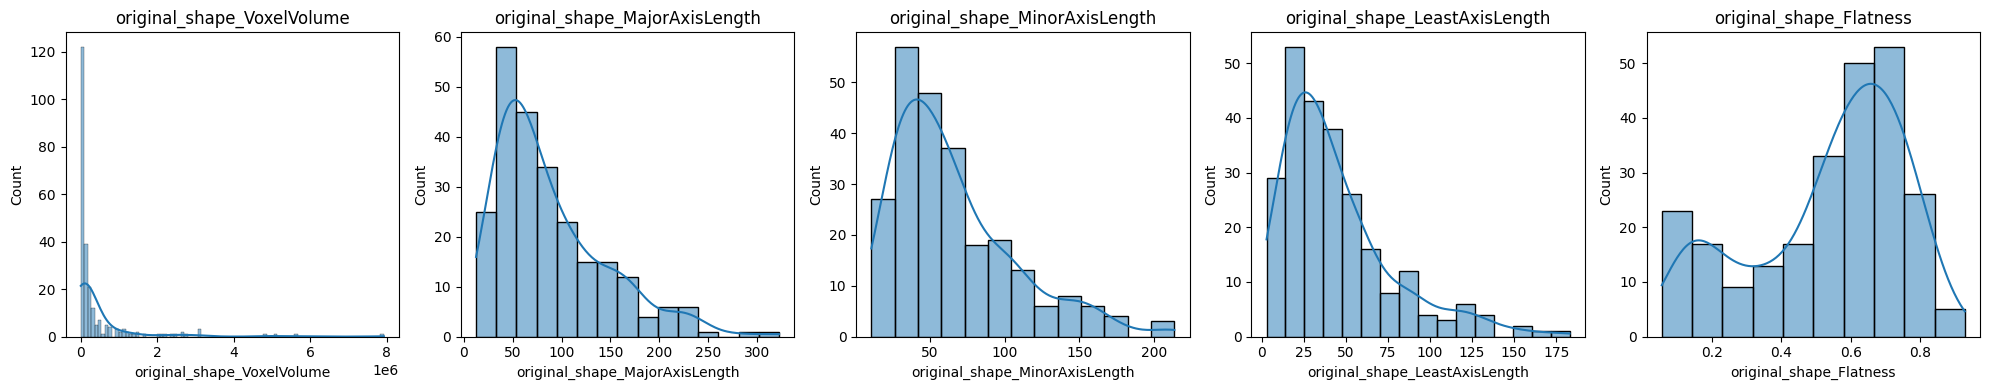

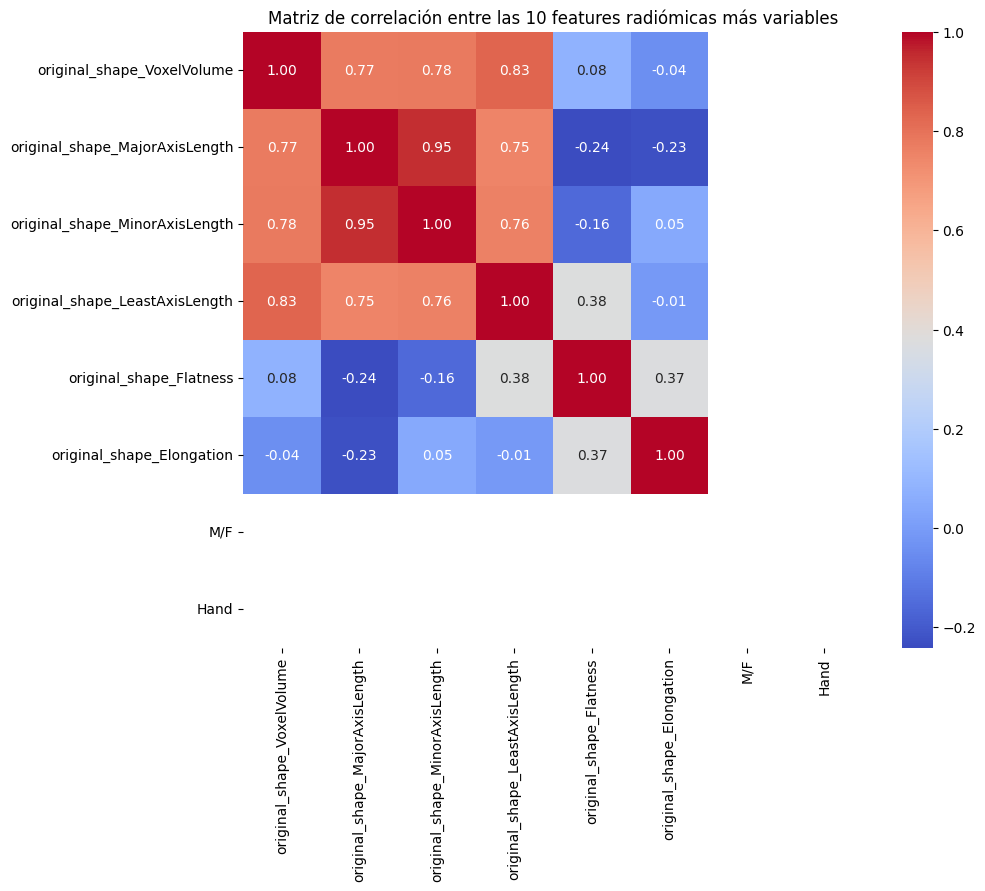

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de columnas radiómicas numéricas
exclude_cols = ['PatientID', 'Age', 'Sex', 'Diagnosis', 'Diagnosis_binary', 'Phenotype', 'Subject', 'Dataset', 'Notes', 'YOB', 'MR Sessions', 'CT Sessions']
exclude_cols += [col for col in df_all.columns if col.startswith('diagnostics_')]
radiomic_cols = [col for col in df_all.columns if col not in exclude_cols]
radiomic_numeric = df_all[radiomic_cols].apply(pd.to_numeric, errors='coerce')

# Estadísticos descriptivos
desc = radiomic_numeric.describe().T[['mean', '50%', 'std', 'min', 'max']].rename(columns={'50%': 'median'})
desc_sorted = desc.sort_values('std', ascending=False)
print('Estadísticos descriptivos de las variables radiómicas numéricas:')
display(desc_sorted)

# Seleccionar las 5 features más variables
top5 = desc_sorted.head(5).index.tolist()

# Histogramas
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
for i, col in enumerate(top5):
    sns.histplot(radiomic_numeric[col].dropna(), ax=axs[i], kde=True)
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

# Matriz de correlación de las 10 features más variables
top10 = desc_sorted.head(10).index.tolist()
plt.figure(figsize=(10, 8))
sns.heatmap(radiomic_numeric[top10].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre las 10 features radiómicas más variables')
plt.show()

Este análisis permite identificar la variabilidad, distribución y relaciones entre las principales variables radiómicas extraídas del dataset.

# Distribución de las clases
A continuación se analiza la variable objetivo (Diagnosis_binary), mostrando el número y porcentaje de casos por clase, y visualizando la distribución con gráficos de barras y pastel.

Conteo por clase:
Diagnosis_binary
1    125
0    121
Name: count, dtype: int64

Porcentaje por clase:
Diagnosis_binary
1    50.81
0    49.19
Name: proportion, dtype: float64


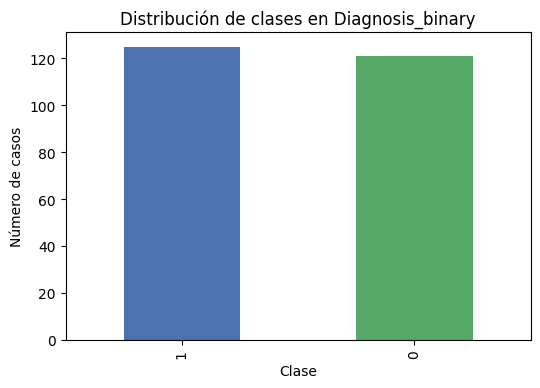

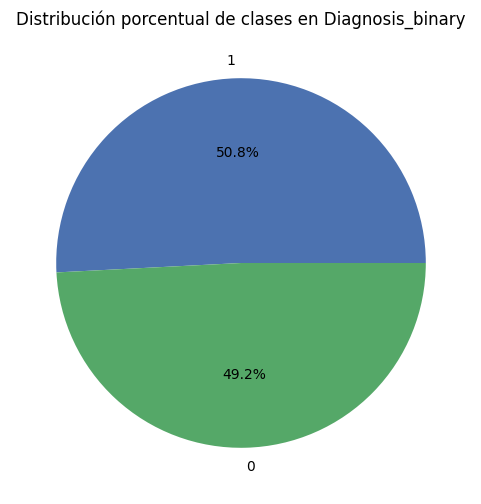

In [23]:
import matplotlib.pyplot as plt

# Variable objetivo
objetivo = 'Diagnosis_binary'

# Conteo y porcentaje por clase
conteo = df_all[objetivo].value_counts(dropna=False)
porcentaje = df_all[objetivo].value_counts(normalize=True, dropna=False) * 100

print('Conteo por clase:')
print(conteo)
print('\nPorcentaje por clase:')
print(porcentaje.round(2))

# Gráfico de barras
plt.figure(figsize=(6,4))
conteo.plot(kind='bar', color=['#4C72B0', '#55A868'])
plt.title('Distribución de clases en Diagnosis_binary')
plt.xlabel('Clase')
plt.ylabel('Número de casos')
plt.show()

# Gráfico de pastel
plt.figure(figsize=(6,6))
conteo.plot(kind='pie', autopct='%1.1f%%', colors=['#4C72B0', '#55A868'])
plt.title('Distribución porcentual de clases en Diagnosis_binary')
plt.ylabel('')
plt.show()

Este análisis muestra la distribución de la variable objetivo, tanto en número absoluto como en porcentaje, y la visualiza de forma gráfica para facilitar la interpretación.

# Relación entre Diagnosis y Diagnosis_binary
A continuación se muestra una tabla cruzada y visualización conjunta de las variables Diagnosis y Diagnosis_binary para analizar la correspondencia entre ambas.

Tabla cruzada Diagnosis vs Diagnosis_binary:


Diagnosis_binary,0,1,All
Diagnosis,,,
GIST,0,125,125
non-GIST,121,0,121
All,121,125,246


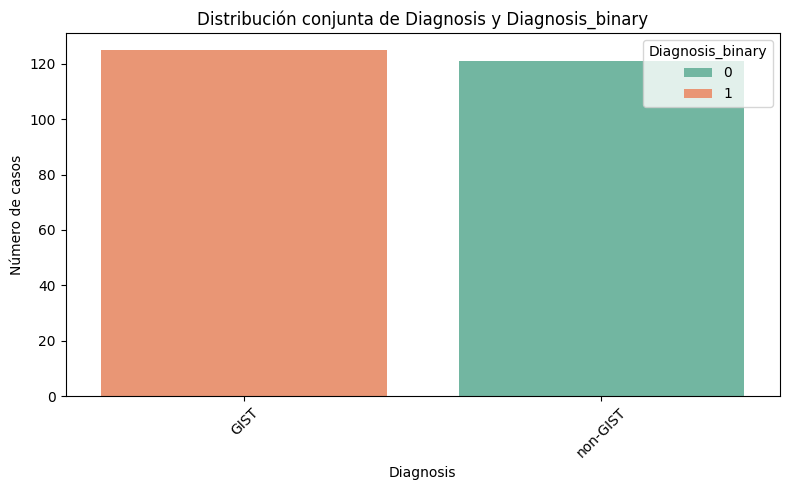

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tabla cruzada
cross_tab = pd.crosstab(df_all['Diagnosis'], df_all['Diagnosis_binary'], margins=True)
print('Tabla cruzada Diagnosis vs Diagnosis_binary:')
display(cross_tab)

# Gráfico de barras agrupadas
plt.figure(figsize=(8,5))
sns.countplot(data=df_all, x='Diagnosis', hue='Diagnosis_binary', palette='Set2')
plt.title('Distribución conjunta de Diagnosis y Diagnosis_binary')
plt.xlabel('Diagnosis')
plt.ylabel('Número de casos')
plt.legend(title='Diagnosis_binary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A partir de la tabla cruzada entre Diagnosis y Diagnosis_binary, se pueden extraer las siguientes conclusiones:

**Correspondencia perfecta entre variables:**
- Todos los casos con Diagnosis = "GIST" tienen Diagnosis_binary = 1 (125 casos).
- Todos los casos con Diagnosis = "non-GIST" tienen Diagnosis_binary = 0 (121 casos).
- No hay casos con Diagnosis = "GIST" y Diagnosis_binary = 0, ni con Diagnosis = "non-GIST" y Diagnosis_binary = 1.

**No hay discrepancias:**
- No existen inconsistencias entre ambas variables. Diagnosis_binary es una codificación binaria directa de Diagnosis.

**Distribución de clases:**
- Hay 125 casos de GIST (50.8%) y 121 casos de non-GIST (49.2%), lo que indica un dataset balanceado entre ambas clases.

**Conclusión:**
Diagnosis_binary representa fielmente la variable Diagnosis, codificando "GIST" como 1 y "non-GIST" como 0. No hay errores de codificación ni casos ambiguos. El dataset es equilibrado, lo que es favorable para análisis estadísticos y modelos de clasificación.

# Correlación entre variables numéricas y la variable objetivo
Se calcula la correlación de Spearman entre las variables numéricas (radiómicas y clínicas) y Diagnosis_binary. Se muestran las 10 variables más correlacionadas positiva y negativamente.

In [25]:
# Selección de variables numéricas (radiómicas y clínicas)
exclude_cols = ['PatientID', 'Sex', 'Diagnosis', 'Diagnosis_binary', 'Phenotype', 'Subject', 'Dataset', 'Notes', 'YOB', 'MR Sessions', 'CT Sessions']
exclude_cols += [col for col in df_all.columns if col.startswith('diagnostics_')]
num_cols = [col for col in df_all.columns if col not in exclude_cols]
num_df = df_all[num_cols].apply(pd.to_numeric, errors='coerce')

# Calcular correlación de Spearman con Diagnosis_binary
correlations = num_df.corrwith(df_all['Diagnosis_binary'], method='spearman').sort_values(ascending=False)

# Mostrar las 10 variables más correlacionadas positiva y negativamente
print('Top 10 correlaciones positivas:')
print(correlations.head(10))
print('\nTop 10 correlaciones negativas:')
print(correlations.tail(10))

Top 10 correlaciones positivas:
original_glszm_SmallAreaHighGrayLevelEmphasis         0.325013
original_gldm_SmallDependenceHighGrayLevelEmphasis    0.303601
original_glszm_HighGrayLevelZoneEmphasis              0.302341
original_glrlm_ShortRunHighGrayLevelEmphasis          0.300509
original_glrlm_HighGrayLevelRunEmphasis               0.299593
original_gldm_HighGrayLevelEmphasis                   0.295929
original_glcm_Autocorrelation                         0.292952
original_glcm_JointAverage                            0.288143
original_firstorder_Range                             0.270739
original_ngtdm_Complexity                             0.259174
dtype: float64

Top 10 correlaciones negativas:
original_glrlm_ShortRunLowGrayLevelEmphasis    -0.285853
original_firstorder_RootMeanSquared            -0.286311
original_firstorder_Mean                       -0.291120
original_firstorder_Median                     -0.291120
original_glszm_SmallAreaLowGrayLevelEmphasis   -0.297990
origi

# Asociación entre variables categóricas y la variable objetivo
Se analiza la asociación entre variables categóricas (clínicas) y Diagnosis_binary usando el test de chi-cuadrado. Se muestran los p-valores para identificar posibles asociaciones relevantes.

In [27]:
from scipy.stats import chi2_contingency

# Selección de variables categóricas (excluyendo Diagnosis, Diagnosis_binary, PatientID, Subject, Dataset, Notes, YOB)
cat_cols = ['Sex', 'Phenotype', 'MR Sessions', 'CT Sessions']

results = []
for col in cat_cols:
    contingency = pd.crosstab(df_all[col], df_all['Diagnosis_binary'])
    if contingency.shape[0] > 1 and contingency.shape[1] > 1:
        chi2, p, dof, expected = chi2_contingency(contingency)
        results.append({'Variable': col, 'p-value': p, 'chi2': chi2, 'dof': dof})

results_df = pd.DataFrame(results).sort_values('p-value')
print('Resultados del test de chi-cuadrado para variables categóricas:')
display(results_df)

Resultados del test de chi-cuadrado para variables categóricas:


,Variable,p-value,chi2,dof
1,Phenotype,3.965387e-51,246.000000,5
0,Sex,4.441565e-01,0.585521,1


In [30]:
# Buscar incidencias donde Phenotype es 'GIST' y Diagnosis_binary no es 1
incidencias = df_all[(df_all['Phenotype'] == 'GIST') & (df_all['Diagnosis_binary'] != 1)]
print(f"Número de incidencias: {len(incidencias)}")
display(incidencias[['PatientID', 'Phenotype', 'Diagnosis', 'Diagnosis_binary']])

Número de incidencias: 0


,PatientID,Phenotype,Diagnosis,Diagnosis_binary


La conclusión principal del análisis de asociación entre variables categóricas y la variable objetivo Diagnosis_binary es la siguiente:

- **Phenotype** muestra una asociación altamente significativa con Diagnosis_binary (p-value ≈ 3.97e-51, chi2 = 246). Pero despues he verificado que no tiene ninguna incidencia en el dataset donde el phenotype es GIST y el Diagnosis_binary no es 1 entonces esto representa la misma informacion probablemente.  

- **Sex** no muestra una asociación significativa con Diagnosis_binary (p-value ≈ 0.44, chi2 ≈ 0.59). Esto significa que la proporción de sexos es similar en ambos grupos y, por tanto, el sexo no es un factor discriminante entre GIST y non-GIST en este dataset.
